In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, OrderedDict
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import precision_recall_curve,auc,plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

np.random.seed(1337)

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [2]:
main_df = pd.read_csv('term-deposit-marketing-2020.csv')
main_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
main_df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [4]:
main_df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [5]:
main_df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [6]:
main_df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [7]:
def distribution_graph(df):
    fig = plt.figure(figsize=(7, 4))
    freqs = Counter(df)
    freqs_sorted = OrderedDict(freqs.most_common())
    xvals = range(len(freqs_sorted.values()))
    plt.bar(xvals, freqs_sorted.values())
    plt.xticks(xvals, freqs_sorted.keys(),rotation=70)
    plt.title(str(df.name)+' Distribution')
    return fig

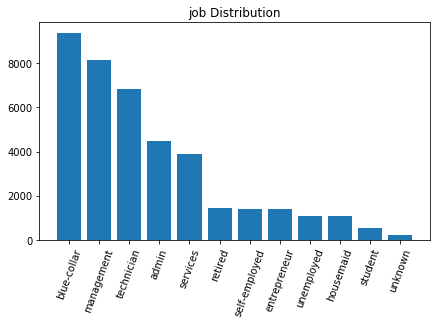

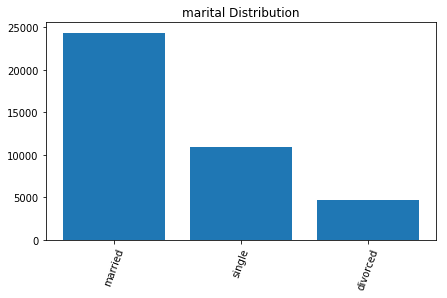

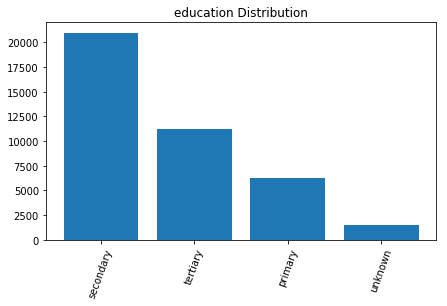

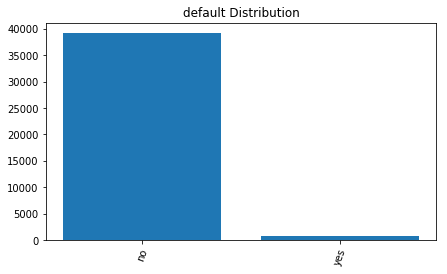

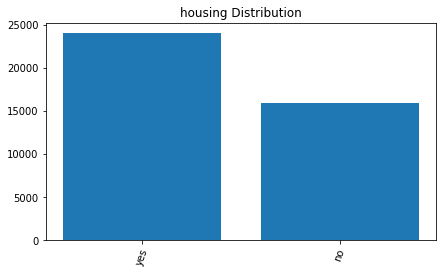

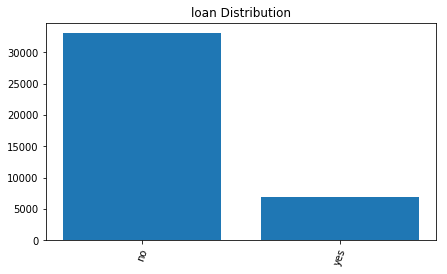

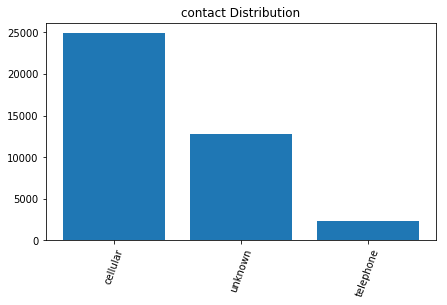

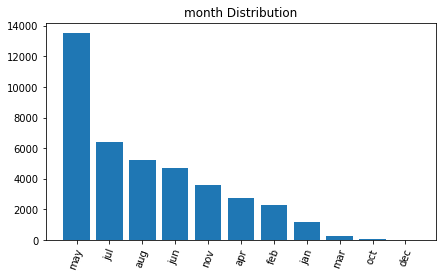

In [8]:
#categorical dist/bar graphs
distribution_graph(main_df.job)
distribution_graph(main_df.marital)
distribution_graph(main_df.education)
distribution_graph(main_df.default)
distribution_graph(main_df.housing)
distribution_graph(main_df.loan)
distribution_graph(main_df.contact)
distribution_graph(main_df.month)
plt.show()

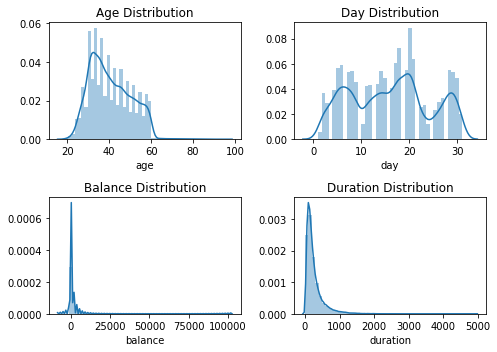

In [9]:
#numerical dist graphs
fig, axes = plt.subplots(2, 2,figsize=(7,5))
sns.distplot(main_df.age,ax=axes[0][0])
axes[0][0].set_title("Age Distribution")
sns.distplot(main_df.balance,ax=axes[1][0])
axes[1][0].set_title("Balance Distribution")
sns.distplot(main_df.day,ax=axes[0][1])
axes[0][1].set_title("Day Distribution")
sns.distplot(main_df.duration,ax=axes[1][1])
axes[1][1].set_title("Duration Distribution")
plt.tight_layout()
plt.show()

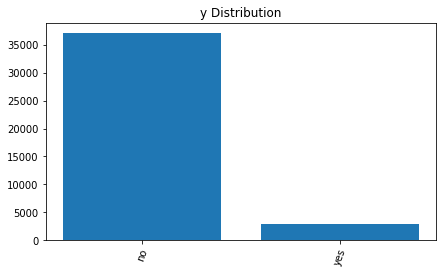

In [10]:
distribution_graph(main_df.y)
plt.show()

In [11]:
#checking if any null values exist on df
np.where(pd.isnull(main_df))

(array([], dtype=int64), array([], dtype=int64))

In [12]:
#one hot encode categorical features
"""
one_hot_df = pd.concat([main_df,pd.get_dummies(main_df.job,prefix="job"),
pd.get_dummies(main_df.contact,prefix="contact"),
pd.get_dummies(main_df.education,prefix="education"),
pd.get_dummies(main_df.marital,prefix="marital")],axis=1)
"""

#one_hot_df = one_hot_df.drop(['job','contact','education','marital'],axis=1)

one_hot_df = main_df
#label encode binary categorical features and feature with possible relationship within itself
label_encoder = LabelEncoder()
one_hot_df.job = label_encoder.fit_transform(one_hot_df.job)
one_hot_df.contact = label_encoder.fit_transform(one_hot_df.contact)
one_hot_df.education = label_encoder.fit_transform(one_hot_df.education)
one_hot_df.marital = label_encoder.fit_transform(one_hot_df.marital)

one_hot_df.default = label_encoder.fit_transform(one_hot_df.default)
one_hot_df.month = label_encoder.fit_transform(one_hot_df.month)
one_hot_df.housing = label_encoder.fit_transform(one_hot_df.housing)
one_hot_df.loan = label_encoder.fit_transform(one_hot_df.loan)
one_hot_df.y = label_encoder.fit_transform(one_hot_df.y)

one_hot_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [13]:
#removing duration because it can't have any effect on result, we dont know that value before we already know the result
one_hot_df = one_hot_df.drop(['duration'],axis=1)

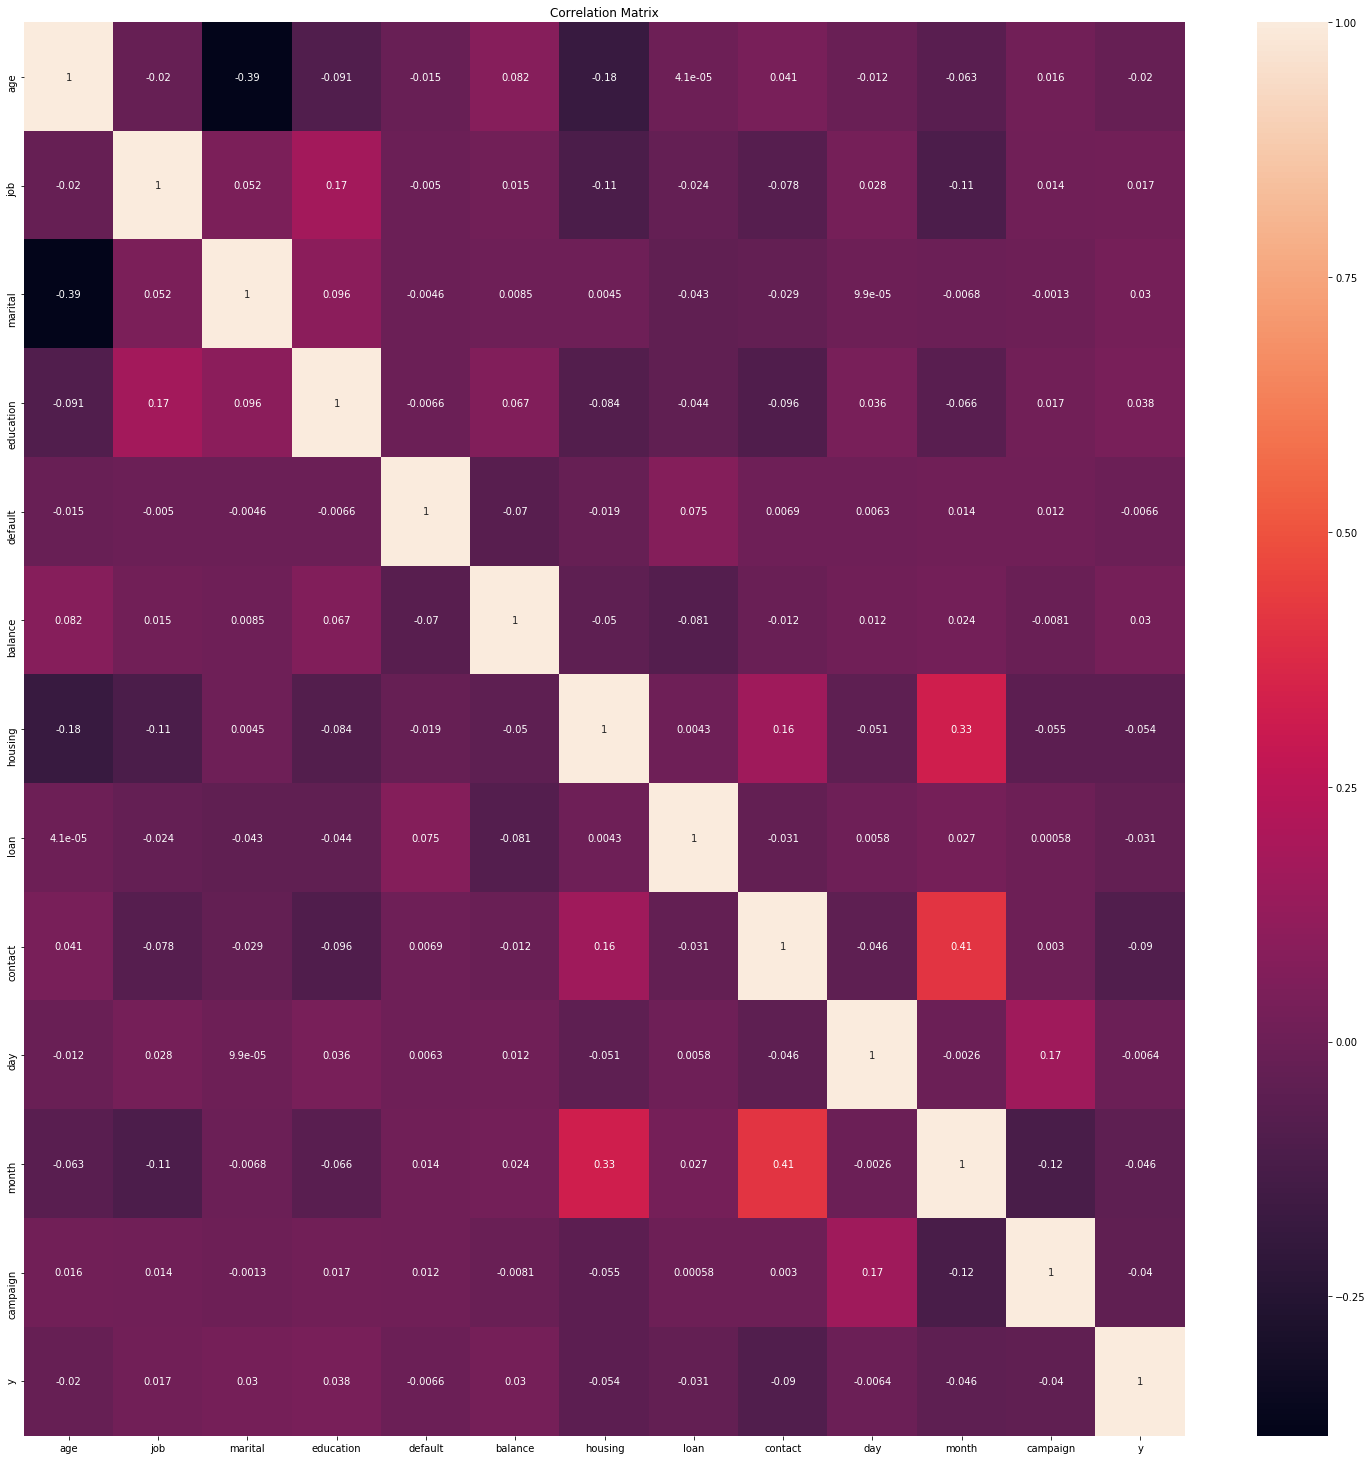

In [14]:
corr = one_hot_df.corr()

fig, ax = plt.subplots(figsize=(26,26))

ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
ax.set_title('Correlation Matrix')
fig.show()

In [15]:
y = one_hot_df['y']
x = one_hot_df.drop(['y'],axis=1)

In [16]:
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(x.values)
x = pd.DataFrame(scaled_features,index=x.index,columns=x.columns)

In [17]:
def stratified_kfold_evaluation(clf,n):
    scores=[]
    skf = StratifiedKFold(n_splits=n)
    for train_index, test_index in skf.split(x,y):
        print("TRAIN:",train_index,"TEST:",test_index)
        x_train, x_test  = x.loc[train_index,:], x.loc[test_index,:]
        y_train, y_test  = y.loc[train_index], y.loc[test_index]
        clf.fit(x_train,y_train)
        score = clf.score(x_test,y_test)
        scores.append(score)
        print("Distribution on y: " , str(Counter(y_train)))
        print("Accuracy = ",str(score))
    return scores

In [18]:
#Decision Tree Classifier
print("Decision Tree Classifier")
clf_decision = DecisionTreeClassifier()
dtc_scores = stratified_kfold_evaluation(clf_decision,5)
print("Mean accuracy score = ", np.mean(dtc_scores))

Decision Tree Classifier
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.927875
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.093
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.024125
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.084625
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.2685
Mean accuracy score =  0.27962499999999996


In [19]:
#Ada Boost Classifier
print("Ada Boost Classifier")
clf_adaboost = AdaBoostClassifier(n_estimators=1000)
ada_scores = stratified_kfold_evaluation(clf_adaboost,5)
print("Mean accuracy score = ", np.mean(ada_scores))

Ada Boost Classifier
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.927375
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.5655
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.710625
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.0995
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.650875
Mean accuracy score =  0.590775


In [20]:
#Random Forest Classifier
print("Random Forest Classifier")
clf_randomforest = RandomForestClassifier(n_estimators=1000)
rfc_scores = stratified_kfold_evaluation(clf_randomforest,5)
print("Mean accuracy score = ", np.mean(rfc_scores))

Random Forest Classifier
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.927625
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.2095
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.111375
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.165875
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.59575
Mean accuracy score =  0.40202499999999997


In [21]:
#KNN Classifier
print("K Neighbors Classifier")
neighbor_scores = []
for k in range(1,10):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = stratified_kfold_evaluation(clf_knn,5)
    neighbor_scores.append(np.mean(knn_scores))
    print("**********************************")
optimal_k = neighbor_scores.index(max(neighbor_scores))
print(optimal_k,neighbor_scores[optimal_k])
knn_scores = neighbor_scores[optimal_k]

K Neighbors Classifier
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.911
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.596
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.5695
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.589375
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.65075
**********************************
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y: 

In [22]:
#XGB Classifier
print("XGBoost Classifier")
clf_xgb = XGBClassifier()
xgb_scores = stratified_kfold_evaluation(clf_xgb,5)
print("Mean accuracy score = ", np.mean(xgb_scores))

XGBoost Classifier
TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.927625
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.105
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.051875
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.0435
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.350875
Mean accuracy score =  0.295775


In [30]:
#Support Vector Classifier
clf_svc = SVC(kernel = 'sigmoid')
svc_scores = stratified_kfold_evaluation(clf_svc,5)
print("Mean accuracy score = ", np.mean(svc_scores))

TRAIN: [ 7660  7661  7662 ... 39997 39998 39999] TEST: [    0     1     2 ... 14569 14591 14619]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.919375
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [ 7660  7661  7662 ... 24083 24084 24085]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.85
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [15502 15503 15504 ... 31283 31285 31286]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.86575
TRAIN: [    0     1     2 ... 39997 39998 39999] TEST: [23385 23386 23387 ... 34344 34346 34350]
Distribution on y:  Counter({0: 29683, 1: 2317})
Accuracy =  0.845
TRAIN: [    0     1     2 ... 34344 34346 34350] TEST: [31512 31513 31514 ... 39997 39998 39999]
Distribution on y:  Counter({0: 29684, 1: 2316})
Accuracy =  0.863625
Mean accuracy score =  0.86875


        knn  randomforest  adaboost  decision   xgboost      svc
0  0.865425      0.402025  0.590775  0.279625  0.295775  0.86875


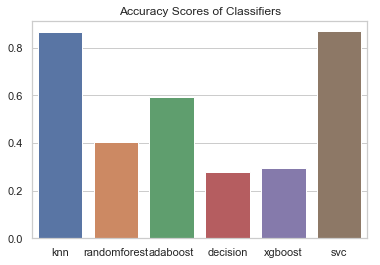

In [31]:
acc_scores = [np.mean(knn_scores),np.mean(rfc_scores),np.mean(ada_scores),np.mean(dtc_scores),np.mean(xgb_scores),np.mean(svc_scores)]
acc_data = pd.DataFrame(acc_scores)
acc_data = acc_data.transpose()
acc_data.columns = ['knn','randomforest','adaboost','decision','xgboost','svc']

fig, ax = plt.subplots()
sns.set(style="whitegrid")
ax = sns.barplot(data=acc_data)
ax.set_title('Accuracy Scores of Classifiers')
fig.show()

print(acc_data)

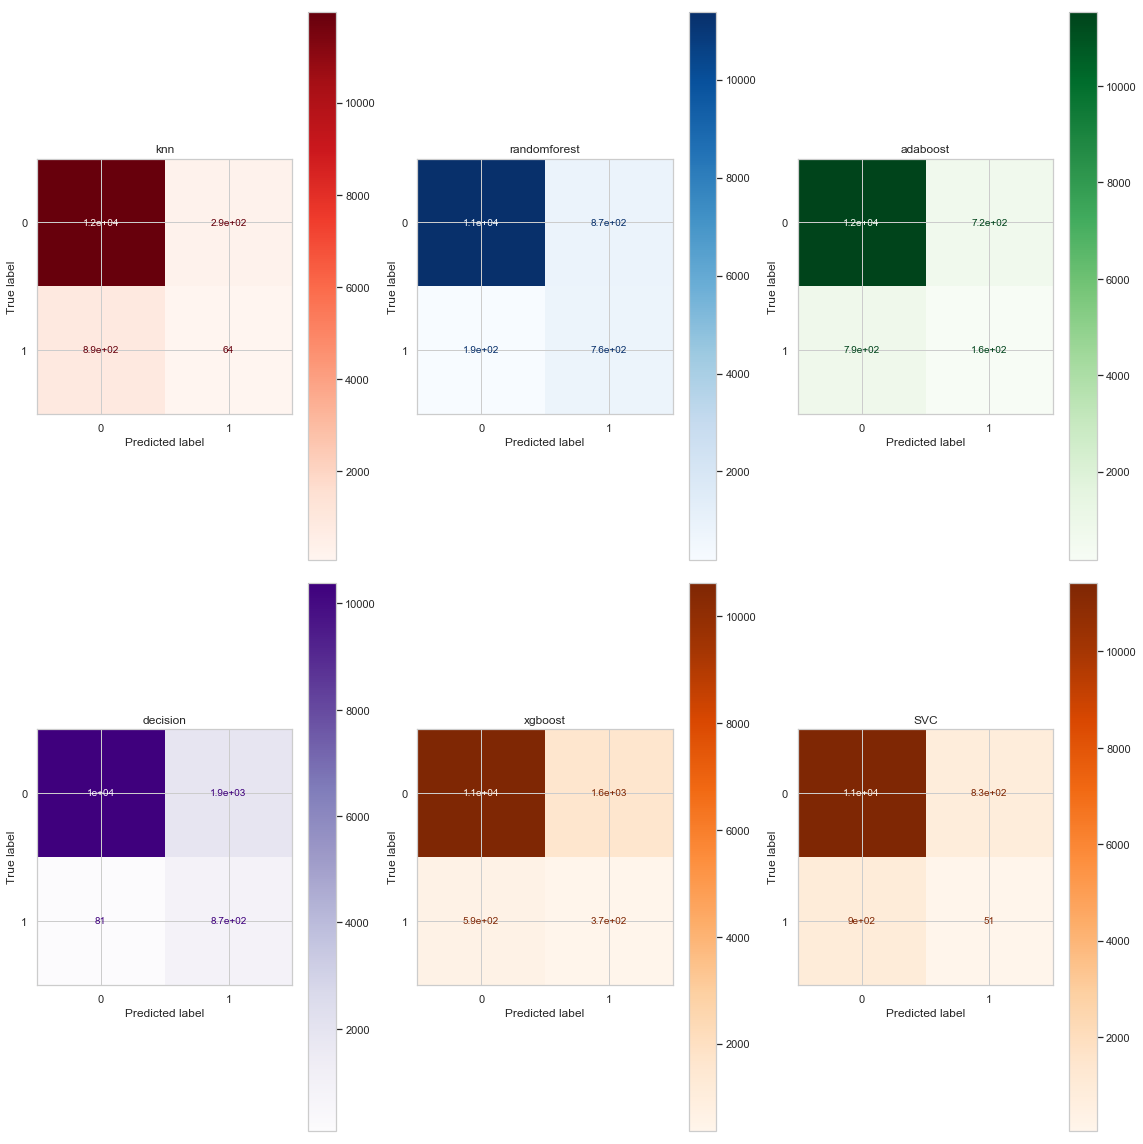

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

fig, ax = plt.subplots(2,3,figsize=(16,16))
ax = ax.flatten()
plot_confusion_matrix(clf_knn, x_test, y_test, cmap=plt.cm.Reds, ax = ax[0],values_format = 'd')
plot_confusion_matrix(clf_randomforest, x_test, y_test, cmap=plt.cm.Blues, ax = ax[1],values_format = 'd')
plot_confusion_matrix(clf_adaboost, x_test, y_test, cmap=plt.cm.Greens, ax = ax[2],values_format = 'd')
plot_confusion_matrix(clf_decision, x_test, y_test, cmap=plt.cm.Purples, ax = ax[3],values_format = 'd')
plot_confusion_matrix(clf_xgb, x_test, y_test, cmap=plt.cm.Oranges, ax = ax[4],values_format = 'd')
plot_confusion_matrix(clf_svc, x_test, y_test, cmap=plt.cm.Oranges, ax = ax[5],values_format = 'd')
ax[0].set_title('knn')
ax[1].set_title('randomforest')
ax[2].set_title('adaboost')
ax[3].set_title('decision')
ax[4].set_title('xgboost')
ax[5].set_title('SVC')
fig.tight_layout()
fig.show()

Considering only predicted labels of 1, which are subscribers lets see who made the best classification with least fault

total subscribers = 950
                 knn	randomf adaboost decision xgboost   svc
false prediction 290	870		720		 1900	  1600	    830
true prediction  64	    760		160		 870	  370		51
%                18     43      18       31       18        5

random forest seems do better at classifying subscribers then the rest
out of 950 total subscribers, 760 were correct. weakness of randomforest comes when classifying 0 non subscribers sometimes labeling them as 1. 870 of them to be exact on this sample set.

Lets analyse precision recall curve as I believe it'll give great insight on classifying unbalanced datasets such as this

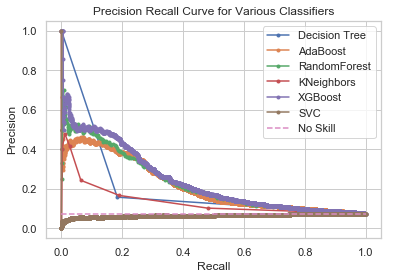

In [36]:
#precision recall curve auc
#precision = tp / (tp + fp)
#recall = tp / (tp + fn)

classifiers = [DecisionTreeClassifier(),
               AdaBoostClassifier(n_estimators=200),
               RandomForestClassifier(n_estimators=200),
               KNeighborsClassifier(n_neighbors=7),
               XGBClassifier(),
               SVC(kernel = 'sigmoid',probability=True)]
classifier_names = ["Decision Tree","AdaBoost","RandomForest","KNeighbors","XGBoost","SVC"]
i=0
auc_scores=[]
for classifier in classifiers:
    classifier.fit(x_train,y_train)
    probs=classifier.predict_proba(x_test)
    probs = probs[:,1]
    precision, recall, threshold = precision_recall_curve(y_test,probs)
    plt.plot(recall, precision, marker='.',label=classifier_names[i])
    i+=1
    auc_scores.append(auc(recall,precision))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Various Classifiers')
plt.legend()
plt.show()

In [48]:
print("Precision Recall Graph Area Under Curve Scores for Classifiers")
print("---")
for i in range(0,len(auc_scores)):
    print(classifier_names[i],round(auc_scores[i],3))

Precision Recall Graph Area Under Curve Scores for Classifiers
---
Decision Tree 0.201
AdaBoost 0.216
RandomForest 0.224
KNeighbors 0.135
XGBoost 0.241
SVC 0.065


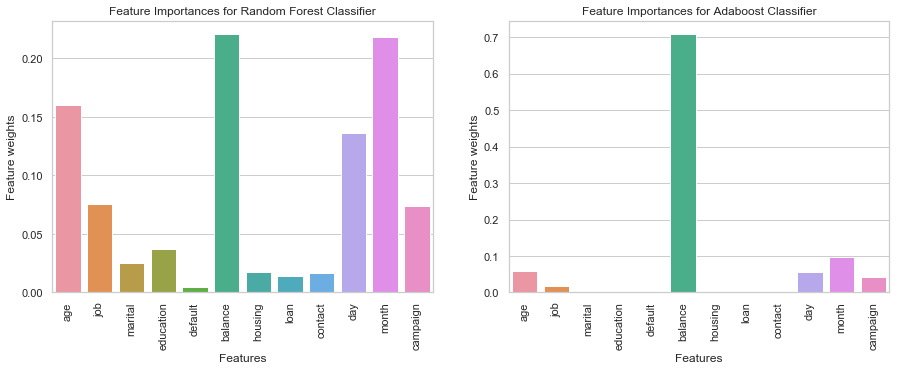

In [49]:
#lets take a look at feature importances on promising models

features = x_train.columns.values

weights_randomforest = clf_randomforest.feature_importances_
feature_weights_randomforest = pd.DataFrame(weights_randomforest)
feature_weights_randomforest = feature_weights_randomforest.transpose()
feature_weights_randomforest.columns = features

weights_adaboost = clf_adaboost.feature_importances_
feature_weights_adaboost = pd.DataFrame(weights_adaboost)
feature_weights_adaboost = feature_weights_adaboost.transpose()
feature_weights_adaboost.columns = features

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=feature_weights_randomforest, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Feature weights')
ax[0].set_title('Feature Importances for Random Forest Classifier')

sns.barplot(data=feature_weights_adaboost, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Feature weights')
ax[1].set_title('Feature Importances for Adaboost Classifier')

fig.show()